## 상관 관계
## 인과 관계

# Lab 1 : 산점도 - 변수 간 관계 표현하기

In [134]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [135]:
import seaborn as sna

<AxesSubplot:xlabel='displ', ylabel='hwy'>

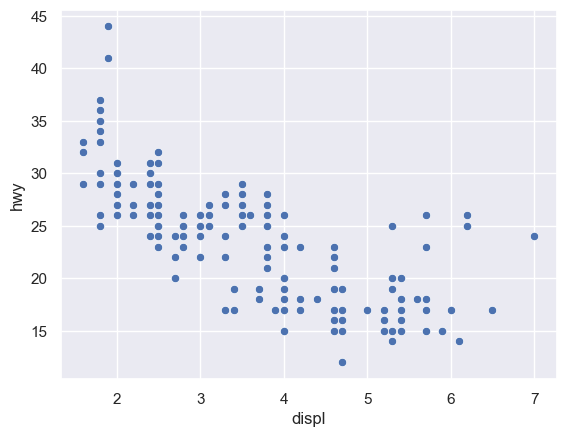

In [136]:
sns.scatterplot(data=mpg, x='displ', y = 'hwy')

[(3.0, 6.0)]

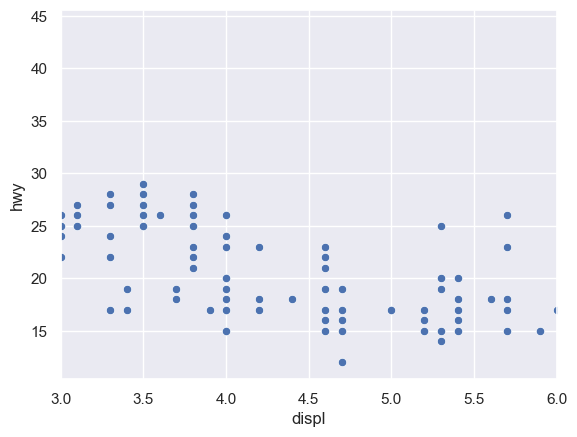

In [137]:
sns.scatterplot(data=mpg, x='displ', y='hwy')\
    .set(xlim = (3,6))

[(3.0, 6.0), (10.0, 30.0)]

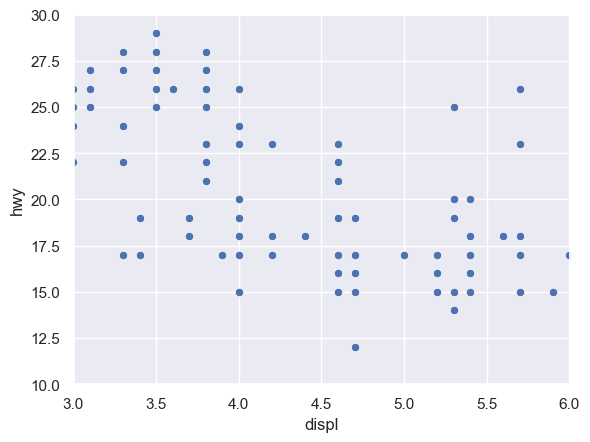

In [138]:
sns.scatterplot(data=mpg, x='displ', y='hwy')\
    .set(xlim = (3,6), ylim = (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

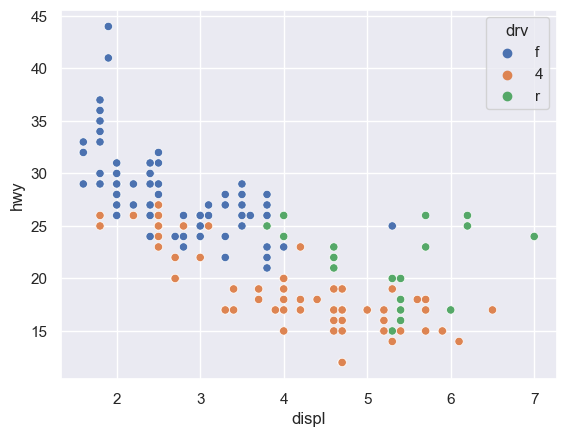

In [139]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv') # hue: marker 색을 종류별로 다르게 표현 가능

# Lab 2 : 혼자서 해보기

<AxesSubplot:xlabel='cty', ylabel='hwy'>

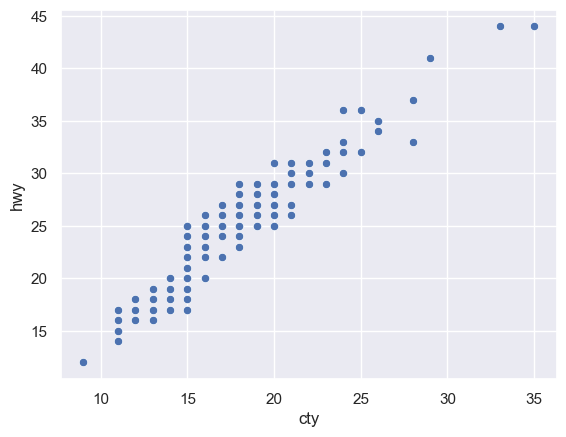

In [140]:
sns.scatterplot(data=mpg, x='cty', y='hwy')

<AxesSubplot:xlabel='cty', ylabel='hwy'>

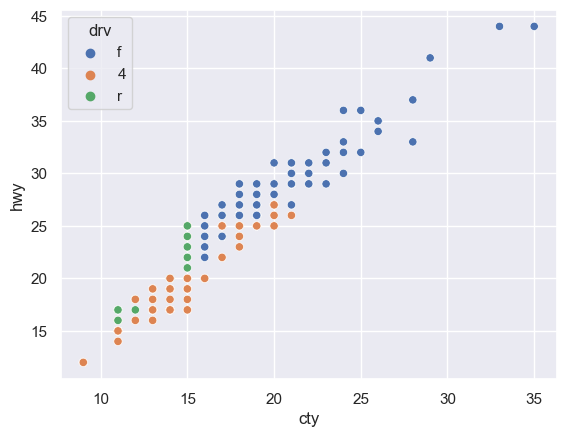

In [141]:
sns.scatterplot(data=mpg, x='cty', y='hwy', hue='drv')

# Q2 : 미국 지역별 인구 정보 데이터 midwest.csv를 이용하여 분석한다

In [142]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

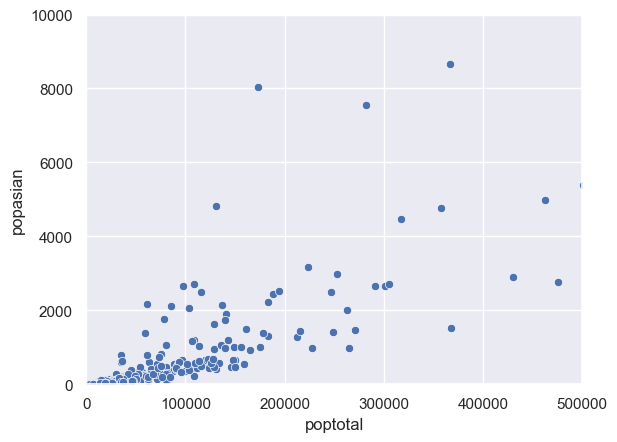

In [143]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian')\
    .set(xlim = (0, 500000), ylim=(0, 10000))

# 08-3 막대 그래프 - 집단 간 차이 표현하기

# Lab 3 : 평균 막대 그래프 만들기
## 1. 집단별 평균표 만들기

In [144]:
mpg = pd.read_csv('mpg.csv')

In [145]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [146]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy','mean')) # 컬럼을 인덱스로 생성하지 않기 위해서 ax_index=False
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

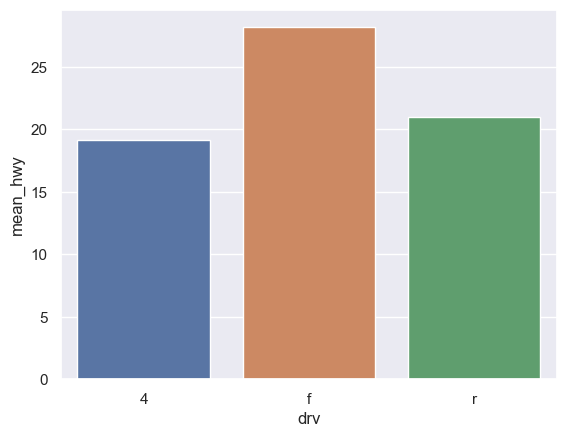

In [147]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [148]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [149]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

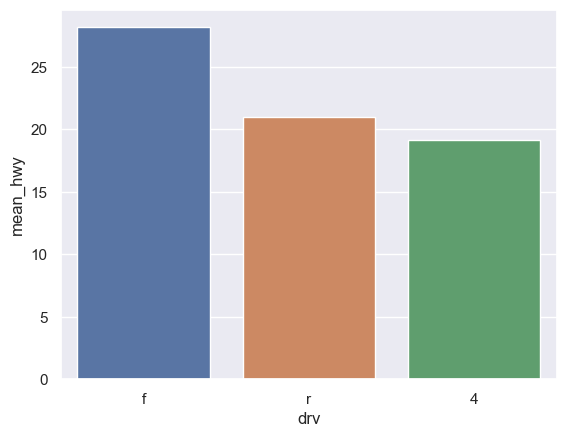

In [150]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

# Lab 4 : 빈도 막대 그래프 만들기
## 1. 집단별 빈도표 만들기

In [151]:
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv=('drv','count'))
df_mpg

,drv,count_drv
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='count_drv'>

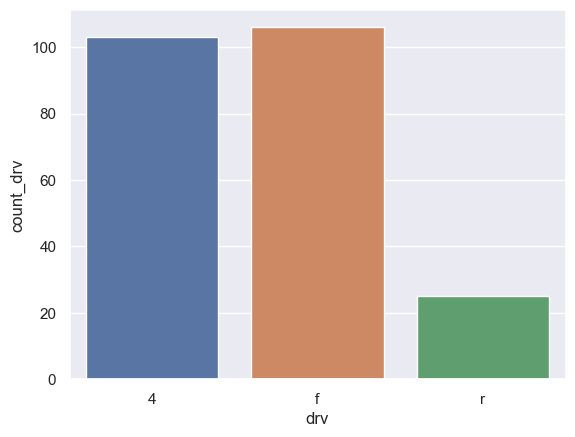

In [152]:
sns.barplot(data=df_mpg, x='drv', y='count_drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

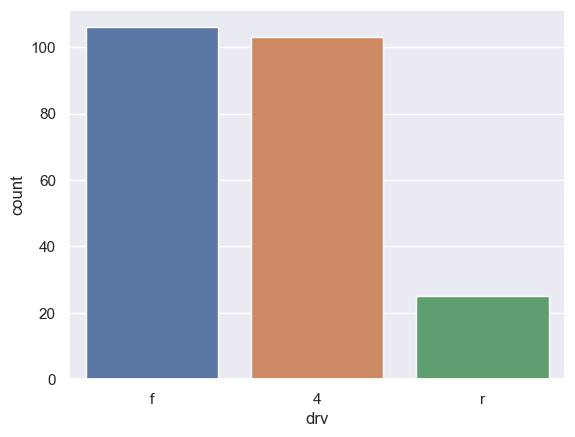

In [153]:
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

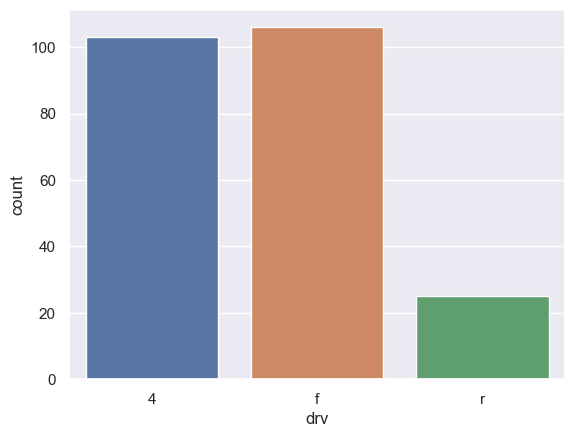

In [154]:
sns.countplot(data=mpg, x='drv', order=['4','f','r'])

<AxesSubplot:xlabel='drv', ylabel='count'>

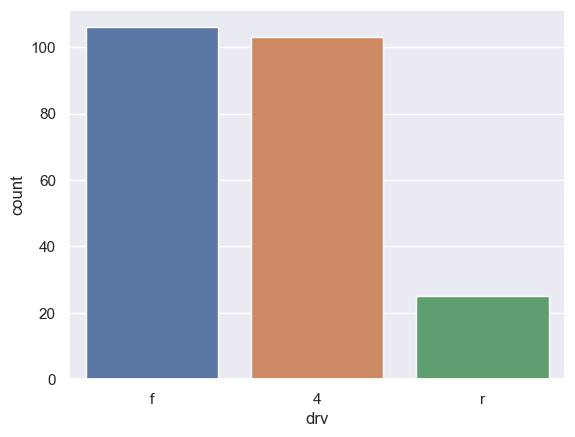

In [155]:
sns.countplot(data=mpg, x='drv', order = mpg['drv'].value_counts().index)

# Lab 5 : 혼자 해보기 (mpg 데이터 분석)
## Q1 : 'suv' 차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기

In [156]:
mpg = pd.read_csv('mpg.csv')

In [157]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [158]:
mpg.query('category == "suv"').head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [159]:
mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty = ('cty','mean'))

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


In [160]:
df = mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty = ('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000
2,ford,12.888889
0,chevrolet,12.666667
1,dodge,11.857143
4,land rover,11.500000
5,lincoln,11.333333


In [165]:
df = mpg.query('category == "suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty = ('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False).head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

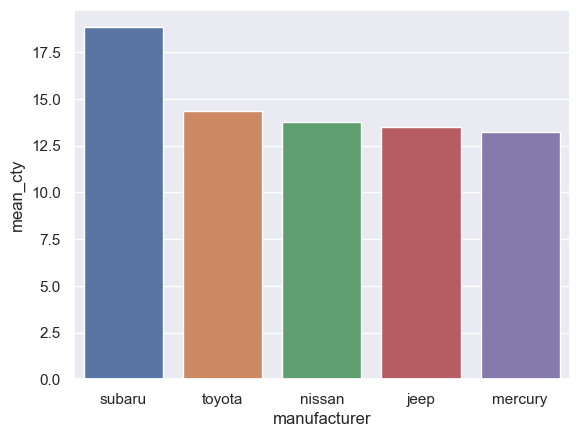

In [166]:
sns.barplot(data=df, x='manufacturer', y='mean_cty')

In [167]:
df = mpg.groupby('category', as_index=False)\
    .agg(n = ('category','count'))\
    .sort_values('n', ascending = False)

<AxesSubplot:xlabel='category', ylabel='n'>

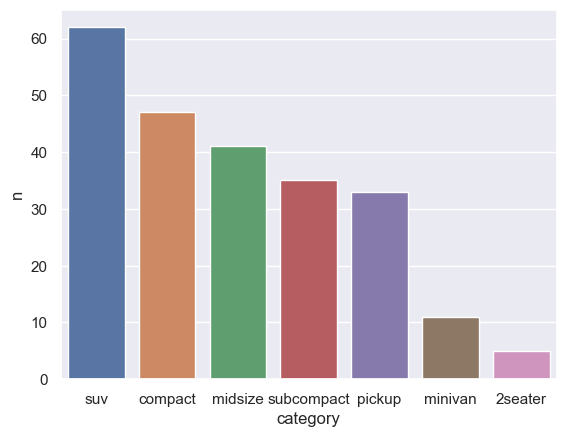

In [168]:
sns.barplot(data=df, x='category', y = 'n')

# 08-4 선 그래프 - 시간에 따라 달라지느 데이터 표현하기

# Lab 6 :  시계열 그래프 만들기 - econimics 데이터 분석

In [169]:
import pandas as pd
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [170]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


<AxesSubplot:xlabel='date', ylabel='unemploy'>

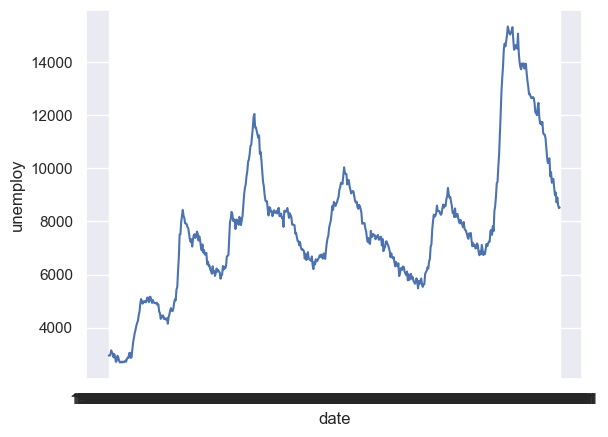

In [171]:
import seaborn as sns
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [172]:
economics['date2'] = pd.to_datetime(economics['date'])

In [173]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [174]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [175]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [176]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [177]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [178]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


In [179]:
economics['month'] = economics['date2'].dt.month
economics.head(20)

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11
5,1967-12-01,525.1,199657.0,11.8,4.8,3018,1967-12-01,1967,12
6,1968-01-01,530.9,199808.0,11.7,5.1,2878,1968-01-01,1968,1
7,1968-02-01,533.6,199920.0,12.3,4.5,3001,1968-02-01,1968,2
8,1968-03-01,544.3,200056.0,11.7,4.1,2877,1968-03-01,1968,3
9,1968-04-01,544.0,200208.0,12.3,4.6,2709,1968-04-01,1968,4


<AxesSubplot:xlabel='year', ylabel='unemploy'>

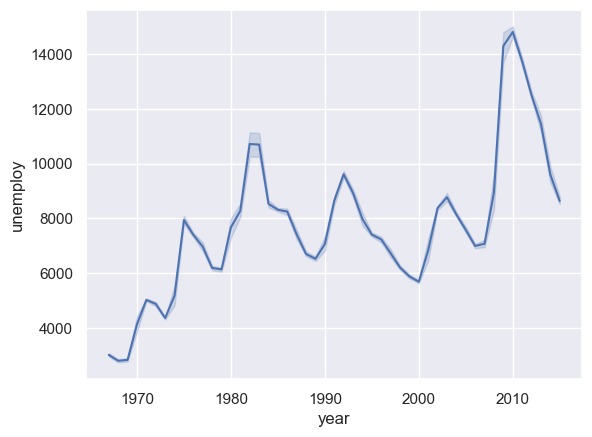

In [180]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

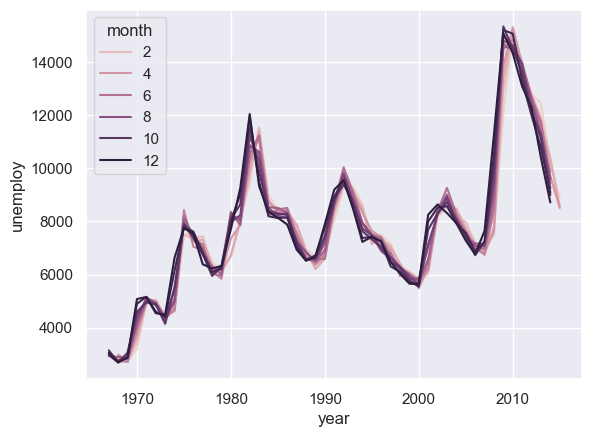

In [181]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', hue='month')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

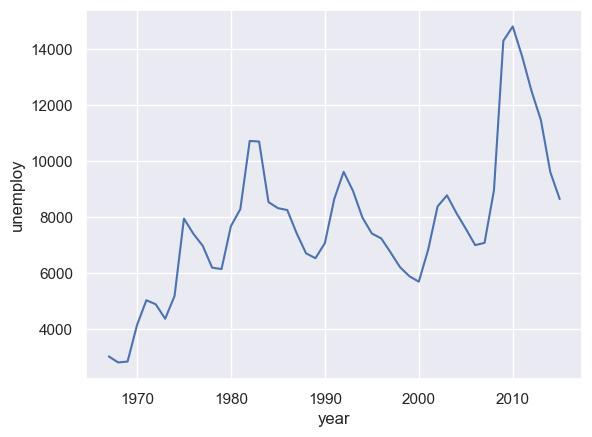

In [182]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci= None)

# Lab 7 : 혼자서 해보기 (economics 데이터 분석 그래프 만들기)

In [183]:
import pandas as pd
import seaborn as sns
economics = pd.read_csv('economics.csv')

In [184]:
economics['date2'] = pd.to_datetime(economics['date'])

In [185]:
economics['year'] = economics['date2'].dt.year

In [186]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='psavert'>

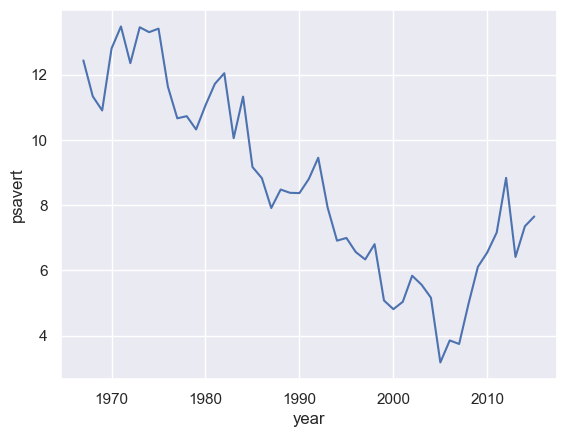

In [187]:
sns.lineplot(data=economics, x='year', y='psavert', ci=None)

In [188]:
economics['month'] = economics['date2'].dt.month

In [189]:
df_2014 = economics.query('year == 2014')

In [190]:
df_2014.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


<AxesSubplot:xlabel='month', ylabel='psavert'>

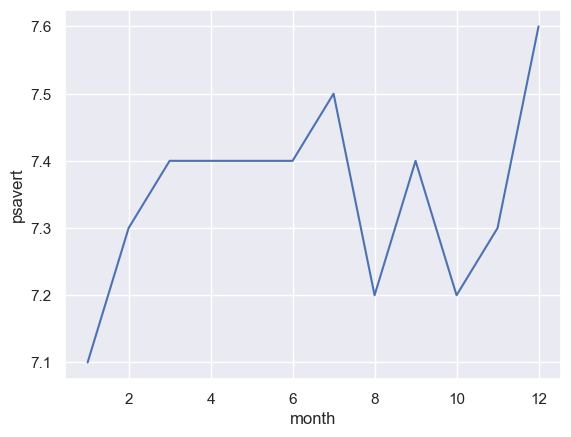

In [191]:
sns.lineplot(data=df_2014, x='month', y='psavert', ci=None)

# 08-5 상자 그림 - 집단 간 분포 차이 표현하기

# Lab 8 : 상자 그림 만들기

In [193]:
import pandas as pd
import seaborn as sns
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:xlabel='drv', ylabel='hwy'>

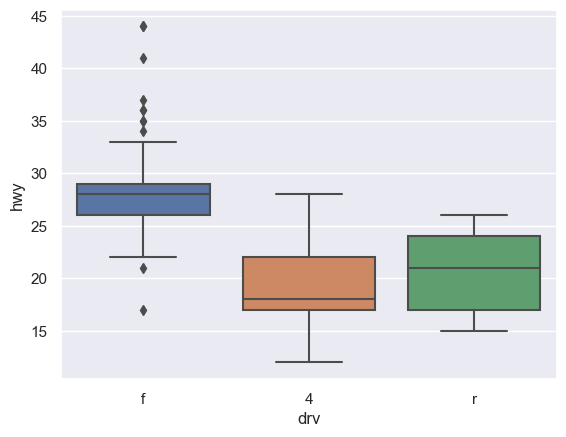

In [194]:
sns.boxplot(data=mpg, x='drv', y='hwy')

# Lab 8 : 혼자해 보기 - mpg 데이터를 분석해 보기

In [195]:
import pandas as pd
import seaborn as sns

In [196]:
mpg = pd.read_csv('mpg.csv')

In [197]:
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category  
honda         civic               1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
chevrolet     c1500 suburban 2wd  5.3    2008  8    auto(l4)    r    14   20   r   suv           2
ford          explorer 4wd        4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         durango 4wd         4.7    2008  8    auto(l5)    4    13   17   r   suv           2
subaru        impreza awd         2.5    2008  4    auto(s4)    4    20   27   r   compact       1
                                                                                                ..
ford          mustang             4.6    1999  8    manual(m5)  r    15   22   r   subcompact    1
                                                    auto(l4)    r    15   21   r   subcompact    1
                                  4.0    2008  6    manual(m5)  r    17   26   r   subcompact    1
               

<AxesSubplot:xlabel='category', ylabel='cty'>

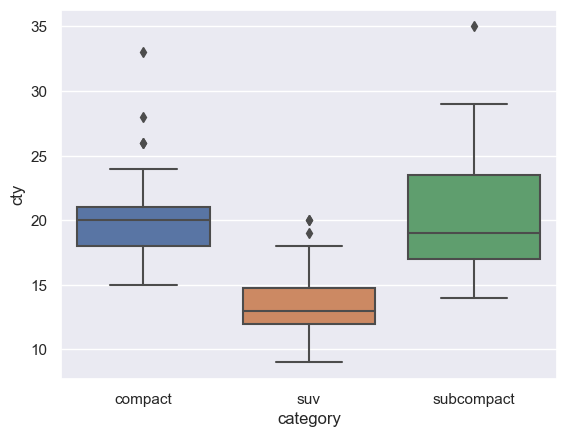

In [198]:
sns.boxplot(data=df, x='category', y='cty')